In [1]:
from kan import *

# create a a KAN: 2D inputs, 1D output, and 5 hidden neurons.
# cublic spline, k=3, and 
# 5 grid intervals (grid=5)
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)


# Create dataset f(x, y)=exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

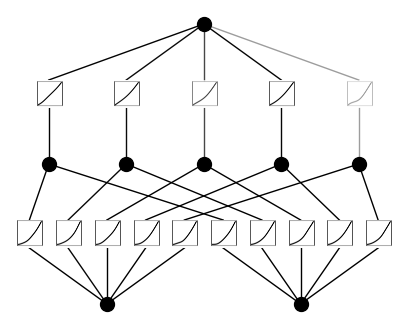

In [2]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

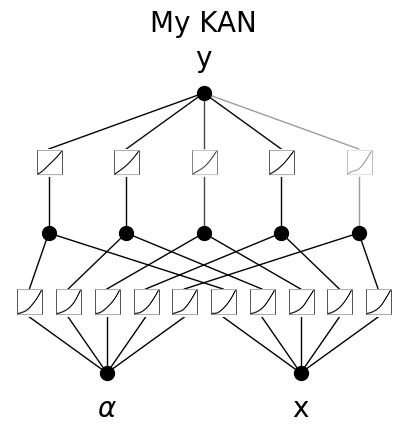

In [3]:
# if you want to add variable names and title
model.plot(beta=100, in_vars=[r'$\alpha$', 'x'], out_vars=['y'], title = 'My KAN')

In [4]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.38e-01 | test loss: 1.40e-01 | reg: 2.74e+01 : 100%|██| 20/20 [00:06<00:00,  3.30it/s]


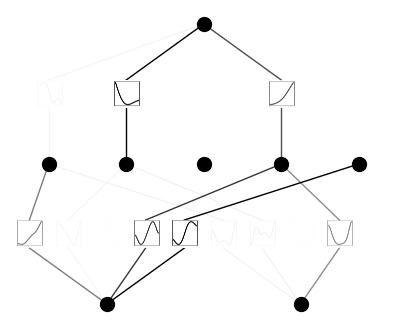

In [5]:
model.plot(beta=3)

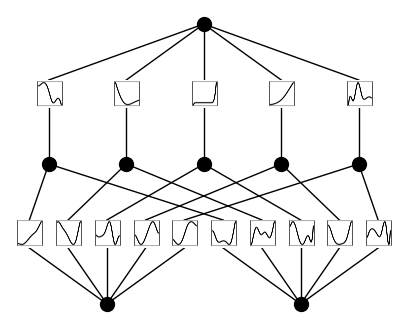

In [6]:
model.plot(beta=100000)


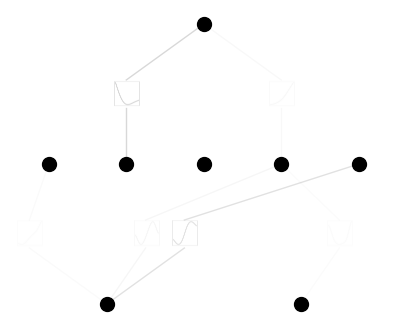

In [7]:
model.plot(beta=0.1)


After purning, "mask=True" will remove all connections that are connected to unsignificant neurons. The insignificant neurons themselves are still visualized. If you want those neurons to be removed as well, see below. Insignificant/Significant neurons are defined based on l1 norm of its incoming and outgoing functions.

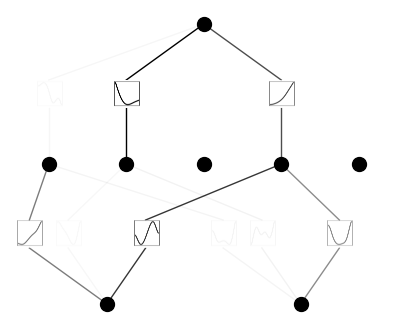

In [8]:
model.prune()
model.plot(mask=True)

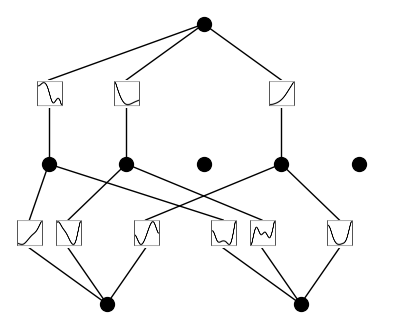

In [9]:
model.plot(mask=True, beta=100000)


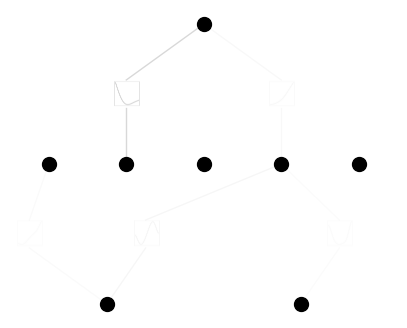

In [10]:
model.plot(mask=True, beta=0.1)


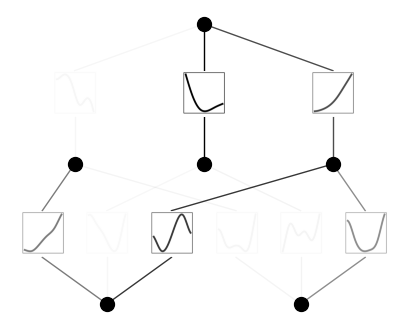

In [11]:
model2 = model.prune()
model2(dataset['train_input']) # it's important to do a forward first to collect activations
model2.plot()

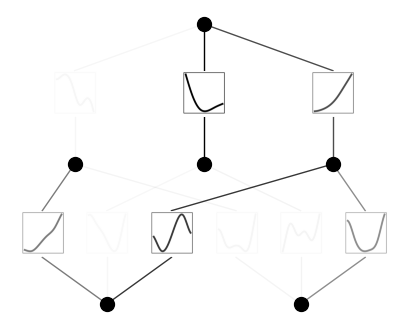

In [12]:
model2.plot(scale=0.5)


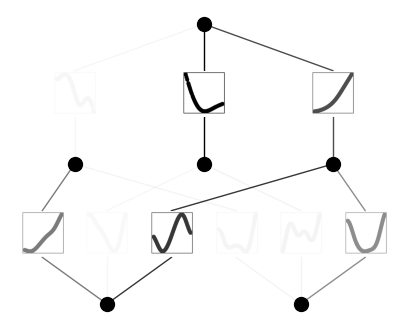

In [13]:
model2(dataset['train_input'])
model2.plot(sample=True)

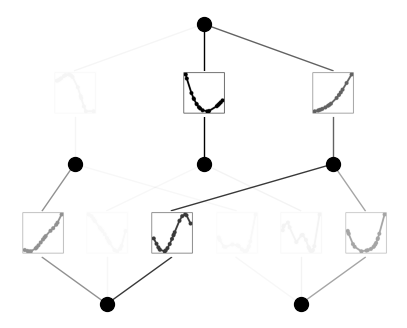

In [14]:
model2(dataset['train_input'][:20])
model2.plot(sample=True)

In [19]:
model2.fix_symbolic(0,1,2,'x^2')

Best value at boundary.
r2 is 0.9732745885848999


tensor(0.9733)

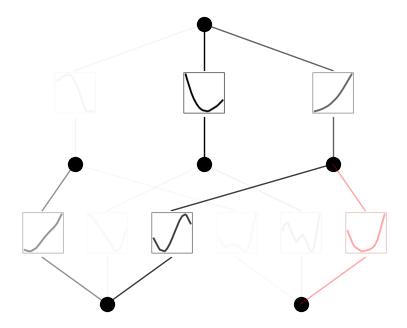

In [20]:
model2.plot()


In [21]:
model2.set_mode(0,1,2,mode='ns')


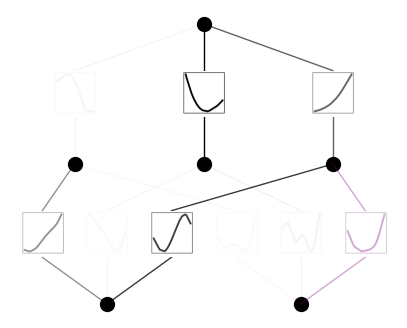

In [22]:
model2.plot()


r2 is 0.9977598190307617


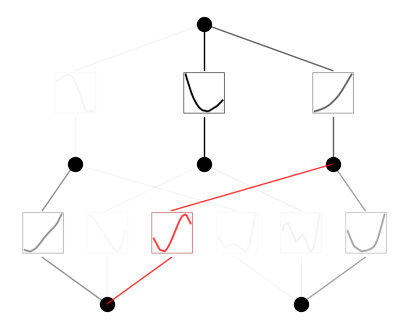

In [35]:
model2.fix_symbolic(0,0,2,'sin')
model2.plot()


In [36]:
model2.unfix_symbolic_all()